In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "BCEA_March 24.csv"  
df = pd.read_csv(file_path)
print("Column Names in the Dataset:")
print(df.columns.tolist())

Column Names in the Dataset:
['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore', 'Consent age', 'Consent', 'AGE', 'Gender', 'Race', 'Weight', 'Height', 'Fitness apps rating', 'Account creation', 'Difficulties text ', 'equipment', 'relevance', 'navigation', 'visual appeal\xa0', 'workout interface ', 'summary screens ', 'feedback mechanism ', 'schedule ', 'consistency', 'motivation ', 'ranking features_1', 'ranking features_2', 'ranking features_3', 'ranking features_4', 'ranking features_5', 'ranking features_6', 'ranking features_6_TEXT', 'tech issues ', 'tech issues _5_TEXT', 'overall satisfaction', 'continuity', 'recommendation', 'improvement text ']


In [2]:
constructs = {
    "Account Setup & First Impressions": ["Account creation"],
    "Equipment & Exercise Features": ["equipment", "relevance"],
    "User Interface & Navigation": ["navigation", "visual appeal"],
    "Workout Experience": ["workout interface", "summary screens", "feedback mechanism"],
    "Scheduling & Consistency": ["schedule", "consistency"],
    "Motivation Features": ["motivation"],
    "Technical Performance": ["tech issues"],
    "Overall Experience": ["overall satisfaction", "continuity", "recommendation"],
}


In [3]:
df.columns = df.columns.str.strip().str.replace("\xa0", "", regex=True)

In [4]:
print(df.columns.tolist())

['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore', 'Consent age', 'Consent', 'AGE', 'Gender', 'Race', 'Weight', 'Height', 'Fitness apps rating', 'Account creation', 'Difficulties text', 'equipment', 'relevance', 'navigation', 'visual appeal', 'workout interface', 'summary screens', 'feedback mechanism', 'schedule', 'consistency', 'motivation', 'ranking features_1', 'ranking features_2', 'ranking features_3', 'ranking features_4', 'ranking features_5', 'ranking features_6', 'ranking features_6_TEXT', 'tech issues', 'tech issues _5_TEXT', 'overall satisfaction', 'continuity', 'recommendation', 'improvement text']


In [5]:
# Check Unique Values for All Columns
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")  # Show all unique values
    print("-" * 50)


Unique Values in Each Column:
StartDate: ['Start Date' '{"ImportId":"startDate","timeZone":"America/Denver"}'
 '2025-03-18 12:58:08' '2025-03-19 20:04:46' '2025-03-18 12:29:03'
 '2025-03-20 00:15:07' '2025-03-20 00:37:40' '2025-03-20 12:07:05'
 '2025-03-20 13:04:12' '2025-03-20 13:52:56' '2025-03-20 15:58:03'
 '2025-03-21 01:00:19' '2025-03-21 15:57:44' '2025-03-22 14:25:46'
 '2025-03-22 20:35:44' '2025-03-22 20:34:40' '2025-03-23 10:42:04'
 '2025-03-24 09:18:58' '2025-03-24 10:57:40' '2025-03-24 11:00:53'
 '2025-03-24 11:05:38' '2025-03-24 11:43:53' '2025-03-24 14:35:32']
--------------------------------------------------
EndDate: ['End Date' '{"ImportId":"endDate","timeZone":"America/Denver"}'
 '2025-03-18 12:58:15' '2025-03-19 20:20:30' '2025-03-19 22:11:03'
 '2025-03-20 00:17:28' '2025-03-20 00:39:50' '2025-03-20 12:09:53'
 '2025-03-20 13:07:10' '2025-03-20 13:55:36' '2025-03-20 16:00:11'
 '2025-03-21 01:04:07' '2025-03-21 16:23:20' '2025-03-22 14:28:53'
 '2025-03-22 20:38:10' '20

In [6]:
# Step 1: Identify the first row with real responses
first_data_row = None  # Ensure it is defined

for i in range(5):  # Check first 5 rows
    row_values = df.iloc[i].astype(str)
    
    # If this row does NOT contain ImportId or question-like text, it's real data
    if not any(row_values.str.contains("ImportId|startDate|Response Type|IP Address", regex=True, na=False)):
        first_data_row = i
        break

# Step 2: Fallback if no valid row was found (to prevent NameError)
if first_data_row is None:
    first_data_row = 2  # Default to row 2 if detection fails

# Step 3: Drop all rows above the first valid response row
df = df.iloc[first_data_row:].reset_index(drop=True)

# Step 4: Recheck unique values for ALL values in each column
print("\n Unique Values After Cleaning (All Values):")
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].unique())  # Show ALL unique values
    print("-" * 50)

# Print confirmation
print(f" Removed metadata/question rows. Data now starts from row {first_data_row}.")


 Unique Values After Cleaning (All Values):

StartDate:
['2025-03-18 12:58:08' '2025-03-19 20:04:46' '2025-03-18 12:29:03'
 '2025-03-20 00:15:07' '2025-03-20 00:37:40' '2025-03-20 12:07:05'
 '2025-03-20 13:04:12' '2025-03-20 13:52:56' '2025-03-20 15:58:03'
 '2025-03-21 01:00:19' '2025-03-21 15:57:44' '2025-03-22 14:25:46'
 '2025-03-22 20:35:44' '2025-03-22 20:34:40' '2025-03-23 10:42:04'
 '2025-03-24 09:18:58' '2025-03-24 10:57:40' '2025-03-24 11:00:53'
 '2025-03-24 11:05:38' '2025-03-24 11:43:53' '2025-03-24 14:35:32']
--------------------------------------------------

EndDate:
['2025-03-18 12:58:15' '2025-03-19 20:20:30' '2025-03-19 22:11:03'
 '2025-03-20 00:17:28' '2025-03-20 00:39:50' '2025-03-20 12:09:53'
 '2025-03-20 13:07:10' '2025-03-20 13:55:36' '2025-03-20 16:00:11'
 '2025-03-21 01:04:07' '2025-03-21 16:23:20' '2025-03-22 14:28:53'
 '2025-03-22 20:38:10' '2025-03-22 20:40:41' '2025-03-23 10:50:31'
 '2025-03-24 09:22:25' '2025-03-24 11:00:04' '2025-03-24 11:04:43'
 '2025-03-

In [7]:
df.head()


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,ranking features_4,ranking features_5,ranking features_6,ranking features_6_TEXT,tech issues,tech issues _5_TEXT,overall satisfaction,continuity,recommendation,improvement text
0,2025-03-18 12:58:08,2025-03-18 12:58:15,IP Address,134.68.238.188,100,6,True,2025-03-18 12:58:15,R_6rSMVoN0wducpuH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-19 20:04:46,2025-03-19 20:20:30,IP Address,104.241.40.161,100,943,True,2025-03-19 20:20:30,R_5X0bJV5a5xQKU4l,NaN,...,NaN,NaN,NaN,NaN,No issues,NaN,Very satisfied,Very likely,Very likely,NaN
2,2025-03-18 12:29:03,2025-03-19 22:11:03,IP Address,104.28.104.208,100,121320,True,2025-03-19 22:11:04,R_77JuPYdupfxKeNp,NaN,...,5,1,6,NaN,No issues,NaN,Somewhat satisfied,Somewhat likely,Somewhat likely,nothing
3,2025-03-20 00:15:07,2025-03-20 00:17:28,IP Address,104.28.103.207,100,141,True,2025-03-20 00:17:29,R_3qkumMko1Y3R6Se,NaN,...,2,1,6,NaN,No issues,NaN,Very satisfied,Very likely,Very likely,Themes
4,2025-03-20 00:37:40,2025-03-20 00:39:50,IP Address,104.28.103.207,100,129,True,2025-03-20 00:39:51,R_5I68sPkvtUnMv63,NaN,...,1,2,6,NaN,Minor issues that didn't affect usage,NaN,Neutral,Somewhat likely,Neutral,interface


In [8]:
import pandas as pd

constructs = {
    "Account Setup & First Impressions": ["Account creation"],
    "Equipment & Exercise Features": ["equipment", "relevance"],
    "User Interface & Navigation": ["navigation", "visual appeal"],
    "Workout Experience": ["workout interface", "summary screens", "feedback mechanism"],
    "Scheduling & Consistency": ["schedule", "consistency"],
    "Motivation Features": ["motivation"],
    "Technical Performance": ["tech issues"],
    "Overall Experience": ["overall satisfaction", "continuity", "recommendation"],
}

# Ensure columns exist in df before selection
construct_columns = [col for cols in constructs.values() for col in cols if col in df.columns]

# Create new DataFrame with only construct-related columns
df_constructs = df[construct_columns].copy()

# Show first rows to verify
df_constructs.head()


,Account creation,equipment,relevance,navigation,visual appeal,workout interface,summary screens,feedback mechanism,schedule,consistency,motivation,tech issues,overall satisfaction,continuity,recommendation
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,Somewhat Easy,Very Satisfied,Somewhat easy,Good,Somewhat intuitive,Neutral,Very useful,Very easy,Significantly,Very motivating,No issues,Very satisfied,Very likely,Very likely
2,Very easy,Somewhat Easy,Somewhat satisfied,Very easy,Good,Very intuitive,Very helpful,NaN,Very easy,Too early to tell,Moderately motivating,No issues,Somewhat satisfied,Somewhat likely,Somewhat likely
3,Very easy,Very Easy,Very Satisfied,Very easy,Excellent,Very intuitive,Very helpful,Moderately useful,Very easy,Significantly,Very motivating,No issues,Very satisfied,Very likely,Very likely
4,Somewhat easy,Somewhat Difficult,Somewhat dissatisfied,Somewhat easy,Good,Somewhat intuitive,Moderately helpful,Very useful,Very easy,Significantly,Very motivating,Minor issues that didn't affect usage,Neutral,Somewhat likely,Neutral


In [11]:
df_constructs = df_constructs.dropna(how="all").reset_index(drop=True)
df_constructs.head()


,Account creation,equipment,relevance,navigation,visual appeal,workout interface,summary screens,feedback mechanism,schedule,consistency,motivation,tech issues,overall satisfaction,continuity,recommendation
0,Neutral,Somewhat Easy,Very Satisfied,Somewhat easy,Good,Somewhat intuitive,Neutral,Very useful,Very easy,Significantly,Very motivating,No issues,Very satisfied,Very likely,Very likely
1,Very easy,Somewhat Easy,Somewhat satisfied,Very easy,Good,Very intuitive,Very helpful,NaN,Very easy,Too early to tell,Moderately motivating,No issues,Somewhat satisfied,Somewhat likely,Somewhat likely
2,Very easy,Very Easy,Very Satisfied,Very easy,Excellent,Very intuitive,Very helpful,Moderately useful,Very easy,Significantly,Very motivating,No issues,Very satisfied,Very likely,Very likely
3,Somewhat easy,Somewhat Difficult,Somewhat dissatisfied,Somewhat easy,Good,Somewhat intuitive,Moderately helpful,Very useful,Very easy,Significantly,Very motivating,Minor issues that didn't affect usage,Neutral,Somewhat likely,Neutral
4,Very easy,Very Easy,Somewhat satisfied,Very easy,Excellent,Very intuitive,Moderately helpful,Moderately useful,Somewhat easy,Too early to tell,Very motivating,Minor issues that didn't affect usage,Very satisfied,Somewhat likely,Somewhat likely


In [10]:
full_mappings = {
    "Account creation": {"Very difficult": -2, "Somewhat difficult": -1, "Neutral": 0, "Somewhat easy": 1, "Very easy": 2},
    "equipment": {"Very Difficult": -2, "Somewhat Difficult": -1, "Neutral": 0, "Somewhat Easy": 1, "Very Easy": 2},
    "relevance": {"Very dissatisfied": -2, "Somewhat dissatisfied": -1, "Neutral": 0, "Somewhat satisfied": 1, "Very Satisfied": 2},
    "navigation": {"Very difficult": -2, "Somewhat difficult": -1, "Neutral": 0, "Somewhat easy": 1, "Very easy": 2},
    "visual appeal": {"Very poor": -2, "Poor": -1, "Average": 0, "Good": 1, "Excellent": 2},
    "workout interface": {"Very unintuitive": -2, "Somewhat unintuitive": -1, "Neutral": 0, "Somewhat intuitive": 1, "Very intuitive": 2},
    "summary screens": {"Not at all helpful": -2, "Slightly helpful": -1, "Neutral": 0, "Moderately helpful": 1, "Very helpful": 2},
    "feedback mechanism": {"Not at all useful": -2, "Slightly useful": -1, "Moderately useful": 1, "Very useful": 2, "Not Applicable (did not end workout early)": 0},
    "schedule": {"Very difficult": -2, "Somewhat difficult": -1, "Neutral": 0, "Somewhat easy": 1, "Very easy": 2},
    "consistency": {"Not at all": -2, "Slightly": -1, "Moderately": 1, "Significantly": 2, "Too early to tell": 0},
    "motivation": {"Not at all motivating": -2, "Slightly motivating": -1, "Neutral": 0, "Moderately motivating": 1, "Very motivating": 2},
    "tech issues": {
        "No issues": 2,
        "Minor issues that didn't affect usage": 1,
        "Moderate issues that somewhat affected usage": -1,
        "Significant issues that greatly affected usage": -2
    },
    "overall satisfaction": {"Very dissatisfied": -2, "Somewhat dissatisfied": -1, "Neutral": 0, "Somewhat satisfied": 1, "Very satisfied": 2},
    "continuity": {"Very unlikely": -2, "Somewhat unlikely": -1, "Neutral": 0, "Somewhat likely": 1, "Very likely": 2},
    "recommendation": {"Very unlikely": -2, "Somewhat unlikely": -1, "Neutral": 0, "Somewhat likely": 1, "Very likely": 2}
}


In [11]:
df_numeric = df_constructs.copy()

for col, mapping in full_mappings.items():
    if col in df_numeric.columns:
        df_numeric[col + '_num'] = df_numeric[col].map(mapping)


In [12]:
constructs = {
    "Account Setup & First Impressions": ["Account creation"],
    "Equipment & Exercise Features": ["equipment", "relevance"],
    "User Interface & Navigation": ["navigation", "visual appeal"],
    "Workout Experience": ["workout interface", "summary screens", "feedback mechanism"],
    "Scheduling & Consistency": ["schedule", "consistency"],
    "Motivation Features": ["motivation"],
    "Technical Performance": ["tech issues"],
    "Overall Experience": ["overall satisfaction", "continuity", "recommendation"],
}


In [13]:
df_numeric.to_csv("numeric_24.csv", index=False)


# R

In [11]:
df <- read.csv("numeric_24.csv")
head(df)


,Account.creation,equipment,relevance,navigation,visual.appeal,workout.interface,summary.screens,feedback.mechanism,schedule,consistency,⋯,workout.interface_num,summary.screens_num,feedback.mechanism_num,schedule_num,consistency_num,motivation_num,tech.issues_num,overall.satisfaction_num,continuity_num,recommendation_num
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Neutral,Somewhat Easy,Very Satisfied,Somewhat easy,Good,Somewhat intuitive,Neutral,Very useful,Very easy,Significantly,⋯,1,0,2,2,2,2,2,2,2,2
2,Very easy,Somewhat Easy,Somewhat satisfied,Very easy,Good,Very intuitive,Very helpful,,Very easy,Too early to tell,⋯,2,2,NA,2,0,1,2,1,1,1
3,Very easy,Very Easy,Very Satisfied,Very easy,Excellent,Very intuitive,Very helpful,Moderately useful,Very easy,Significantly,⋯,2,2,1,2,2,2,2,2,2,2
4,Somewhat easy,Somewhat Difficult,Somewhat dissatisfied,Somewhat easy,Good,Somewhat intuitive,Moderately helpful,Very useful,Very easy,Significantly,⋯,1,1,2,2,2,2,1,0,1,0
5,Very easy,Very Easy,Somewhat satisfied,Very easy,Excellent,Very intuitive,Moderately helpful,Moderately useful,Somewhat easy,Too early to tell,⋯,2,1,1,1,0,2,1,2,1,1
6,Somewhat easy,Somewhat Easy,Neutral,Very easy,Good,Neutral,Neutral,Moderately useful,Somewhat easy,Moderately,⋯,0,0,1,1,1,0,2,1,0,1


In [12]:
constructs <- list(
  "Account Setup & First Impressions" = c("Account.creation_num"),
  "Equipment & Exercise Features" = c("equipment_num", "relevance_num"),
  "User Interface & Navigation" = c("navigation_num", "visual.appeal_num"),
  "Workout Experience" = c("workout.interface_num", "summary.screens_num", "feedback.mechanism_num"),
  "Scheduling & Consistency" = c("schedule_num", "consistency_num"),
  "Motivation Features" = c("motivation_num"),
  "Technical Performance" = c("tech.issues_num"),
  "Overall Experience" = c("overall.satisfaction_num", "continuity_num", "recommendation_num")
)


In [13]:
cat("=== Unique Responses Per Column ===\n")

for (col in colnames(df)) {
  unique_vals <- unique(df[[col]])

  
  cat("\n", col, "\n", strrep("-", nchar(col)), "\n", sep = "")
  print(unique_vals)
}


=== Unique Responses Per Column ===

Account.creation
----------------
[1] "Neutral"            "Very easy"          "Somewhat easy"     
[4] "Somewhat difficult"

equipment
---------
[1] "Somewhat Easy"      "Very Easy"          "Somewhat Difficult"
[4] "Neutral"           

relevance
---------
[1] "Very Satisfied"        "Somewhat satisfied"    "Somewhat dissatisfied"
[4] "Neutral"              

navigation
----------
[1] "Somewhat easy" "Very easy"     "Neutral"      

visual.appeal
-------------
[1] "Good"      "Excellent" "Average"  

workout.interface
-----------------
[1] "Somewhat intuitive" "Very intuitive"     "Neutral"           

summary.screens
---------------
[1] "Neutral"            "Very helpful"       "Moderately helpful"

feedback.mechanism
------------------
[1] "Very useful"       ""                  "Moderately useful"
[4] "Slightly useful"  

schedule
--------
[1] "Very easy"          "Somewhat easy"      "Somewhat difficult"

consistency
-----------
[1] "Signific

In [14]:
# Ensure psych is loaded
if (!require(psych)) install.packages("psych", dependencies = TRUE)
library(psych)

# Initialize output
alpha_scores <- data.frame(
  Construct = character(),
  Alpha = numeric(),
  Num_Items = integer(),
  stringsAsFactors = FALSE
)

for (name in names(constructs)) {
  items <- constructs[[name]]
  
  if (length(items) == 1) {
    # Only one item — alpha not applicable
    alpha_val <- NA
    num_items <- 1
  } else {
    # Get data for construct
    sub_df <- df[, items]
    
    # Let psych::alpha handle NA internally
    alpha_val <- psych::alpha(sub_df)$total$raw_alpha
    num_items <- length(items)
  }
  
  # Save result
  alpha_scores <- rbind(alpha_scores, data.frame(
    Construct = name,
    Alpha = alpha_val,
    Num_Items = num_items
  ))
}

# View the alpha results
print(alpha_scores)


                          Construct     Alpha Num_Items
1 Account Setup & First Impressions        NA         1
2     Equipment & Exercise Features 0.8268839         2
3       User Interface & Navigation 0.6806283         2
4                Workout Experience 0.6195524         3
5          Scheduling & Consistency 0.7241379         2
6               Motivation Features        NA         1
7             Technical Performance        NA         1
8                Overall Experience 0.7921760         3


In [15]:
alpha_scores <- data.frame(
  Construct = c(
    "Account Setup & First Impressions",
    "Equipment & Exercise Features",
    "UI & Navigation",
    "Workout Experience",
    "Scheduling & Consistency",
    "Motivation Features",
    "Technical Performance",
    "Overall Experience"
  ),
  Alpha = c(NA, 0.83, 0.68, 0.62, 0.72, NA, NA, 0.79)
)


In [16]:
install.packages("ggplot2")


Installing package into ‘/home/jupyter-lapula/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)



In [17]:
library(ggplot2)


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`).”


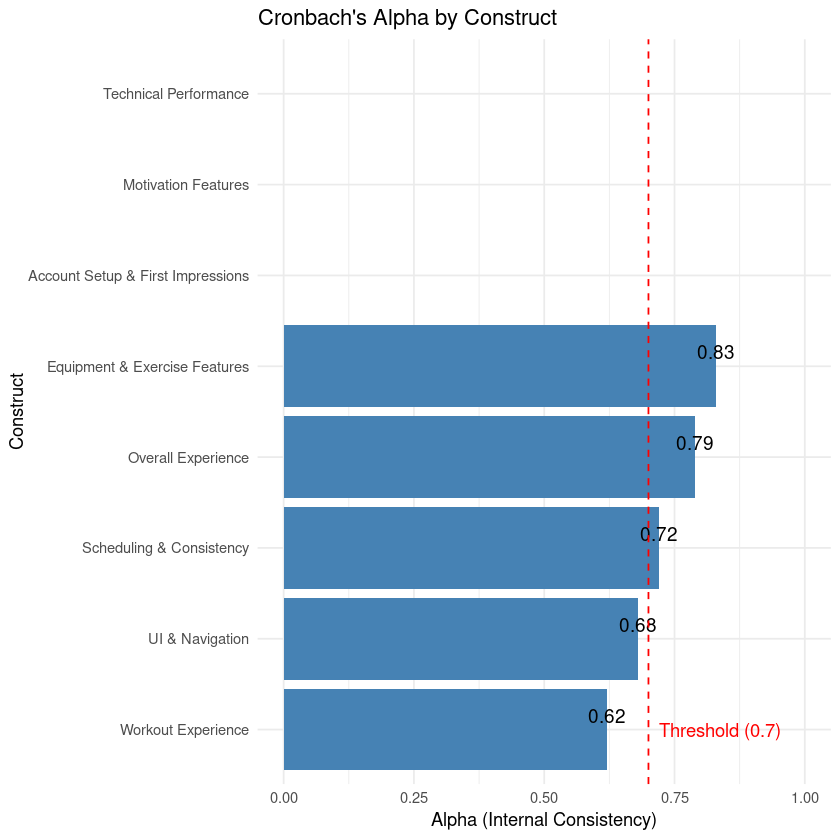

In [18]:
ggplot(alpha_scores, aes(x = reorder(Construct, Alpha), y = Alpha)) +
  geom_bar(stat = "identity", fill = "steelblue", na.rm = TRUE) +
  geom_text(aes(label = ifelse(is.na(Alpha), "N/A", round(Alpha, 2))),
            vjust = -0.5, size = 4) +
  ylim(0, 1) +
  geom_hline(yintercept = 0.7, linetype = "dashed", color = "red") +
  annotate("text", x = 1, y = 0.72, label = "Threshold (0.7)", color = "red", hjust = 0) +
  coord_flip() +
  labs(title = "Cronbach's Alpha by Construct",
       x = "Construct",
       y = "Alpha (Internal Consistency)") +
  theme_minimal()


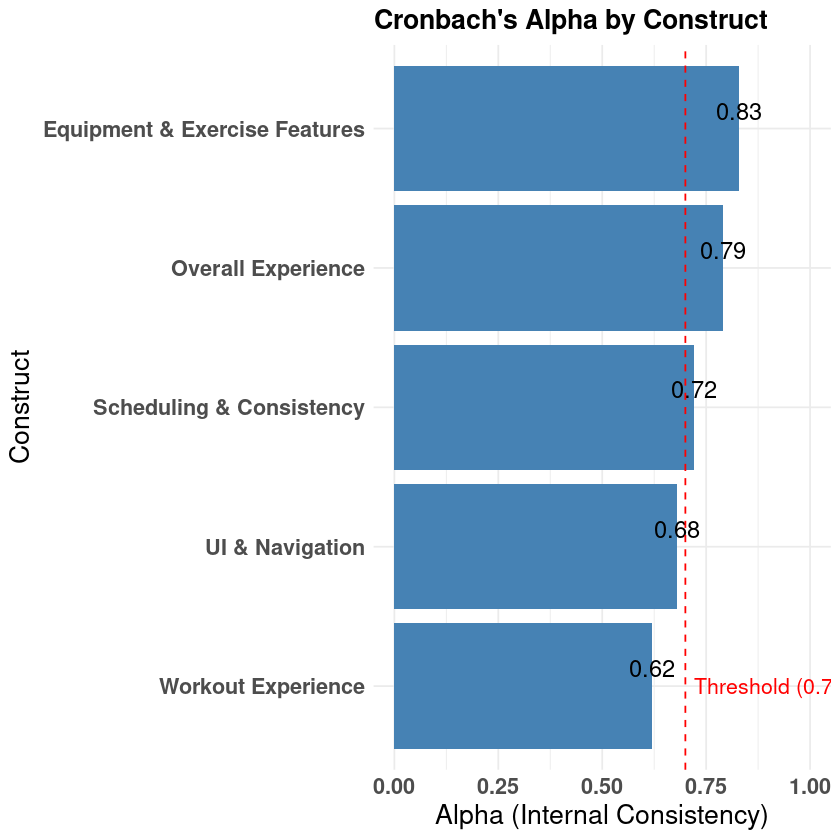

In [19]:
alpha_plot_data <- alpha_scores[!is.na(alpha_scores$Alpha), ]

ggplot(alpha_plot_data, aes(x = reorder(Construct, Alpha), y = Alpha)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = round(Alpha, 2)), vjust = -0.5, size = 5) +  # Increased label size
  ylim(0, 1) +
  geom_hline(yintercept = 0.7, linetype = "dashed", color = "red") +
  annotate("text", x = 1, y = 0.72, label = "Threshold (0.7)", color = "red", hjust = 0, size = 4.5) +
  coord_flip() +
  labs(title = "Cronbach's Alpha by Construct",
       x = "Construct",
       y = "Alpha (Internal Consistency)") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 13, face = "bold"),        # Axis tick labels
    axis.title = element_text(size = 16),       # Axis titles
    plot.title = element_text(size = 16, face = "bold"), # Plot title
    legend.text = element_text(size = 16),      # (If there's a legend)
    legend.title = element_text(size = 16)
  )


Loading required package: corrplot

corrplot 0.95 loaded



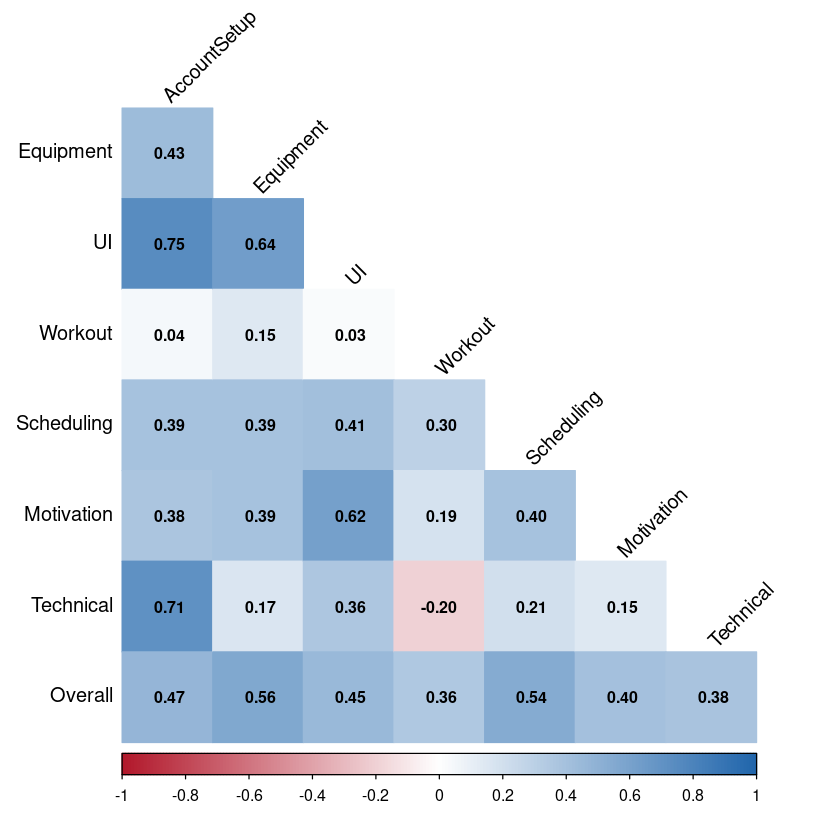

In [21]:
# If not already done, define construct_scores
construct_scores <- data.frame(
  AccountSetup = df$Account.creation_num,
  Equipment = rowMeans(df[, c("equipment_num", "relevance_num")], na.rm = TRUE),
  UI = rowMeans(df[, c("navigation_num", "visual.appeal_num")], na.rm = TRUE),
  Workout = rowMeans(df[, c("workout.interface_num", "summary.screens_num", "feedback.mechanism_num")], na.rm = TRUE),
  Scheduling = rowMeans(df[, c("schedule_num", "consistency_num")], na.rm = TRUE),
  Motivation = df$motivation_num,
  Technical = df$tech.issues_num,
  Overall = rowMeans(df[, c("overall.satisfaction_num", "continuity_num", "recommendation_num")], na.rm = TRUE)
)

# Remove any rows with NA to prepare for correlation
construct_scores <- na.omit(construct_scores)

# Compute correlation matrix
construct_cor_matrix <- cor(construct_scores)

# Load corrplot if not loaded
if (!require(corrplot)) install.packages("corrplot", dependencies = TRUE)
library(corrplot)

# Plot the correlation matrix
corrplot(
  construct_cor_matrix,
  method = "color",
  type = "lower",
  col = colorRampPalette(c("#B2182B", "white", "#2166AC"))(200), # red-white-blue
  tl.col = "black",
  tl.srt = 45,
  addCoef.col = "black",
  number.cex = 0.8,
  diag = FALSE
)


In [16]:
# Step 1: Load the raw demographic CSV
raw_df <- read.csv("BCEA_March 24.csv", stringsAsFactors = FALSE)

# Step 2: Identify the first row of real data (exclude metadata/question text)
first_data_row <- which.max(!apply(raw_df[1:5, ], 1, function(row) {
  any(grepl("ImportId|StartDate|IP Address|Response Type", row))
}))

# Step 3: Keep only actual response rows and reset rownames to P1, P2, ...
clean_df <- raw_df[first_data_row:nrow(raw_df), ]
rownames(clean_df) <- paste0("P", 1:nrow(clean_df))

# Step 4: Identify first valid AGE and drop junk rows (e.g., header/label rows)
first_valid_row <- which(!is.na(as.numeric(clean_df$AGE)))[1]
clean_df <- clean_df[first_valid_row:nrow(clean_df), ]
rownames(clean_df) <- paste0("P", 1:nrow(clean_df))

# Step 5: Drop P19 (row with incomplete data)
clean_df <- clean_df[rownames(clean_df) != "P19", ]
rownames(clean_df) <- paste0("P", 1:nrow(clean_df))  # Reassign IDs after dropping

# Step 6: Extract and clean demographic columns
demographics <- clean_df[, c("AGE", "Gender", "Race", "Weight", "Height")]

# Step 7: Add ID column from rownames for merging/reference
demographics$ID <- rownames(demographics)

# Optional: Preview
head(demographics)



Warning message in which(!is.na(as.numeric(clean_df$AGE))):
“NAs introduced by coercion”


,AGE,Gender,Race,Weight,Height,ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
P1,25,Female,Asian,65,5.2,P1
P2,24,Female,Asian,54,,P2
P3,27,Male,White,70,180,P3
P4,22,Male,Black/African American,87,171,P4
P5,27,Female,Asian,61,"5' 2""",P5
P6,20,Male,White,68,177,P6


In [17]:
head(demographics, 20)  # or View(demographics) to see full table in viewer


,AGE,Gender,Race,Weight,Height,ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
P1,25,Female,Asian,65,5.2,P1
P2,24,Female,Asian,54,,P2
P3,27,Male,White,70,180,P3
P4,22,Male,Black/African American,87,171,P4
P5,27,Female,Asian,61,"5' 2""",P5
P6,20,Male,White,68,177,P6
P7,26,Female,Asian,230,5 ft 2 inches,P7
P8,23,Female,White,57,4-11,P8
P9,27,Female,Asian,56,160,P9


In [19]:
# Clean height: extract digits (assumes cm format)
demographics$Height_cm <- as.numeric(gsub("[^0-9.]", "", demographics$Height))

# Clean weight: extract digits (assumes kg format)
demographics$Weight_kg <- as.numeric(gsub("[^0-9.]", "", demographics$Weight))



In [20]:
# Age
summary(demographics$AGE)
sd(demographics$AGE, na.rm = TRUE)

# Gender
table(demographics$Gender)
prop.table(table(demographics$Gender)) * 100

# Race
table(demographics$Race)
prop.table(table(demographics$Race)) * 100

# Height
summary(demographics$Height_cm)
sd(demographics$Height_cm, na.rm = TRUE)

# Weight
summary(demographics$Weight_kg)
sd(demographics$Weight_kg, na.rm = TRUE)


   Length     Class      Mode 
       19 character character 

[1] 2.678701


Female   Male 
    10      9 


  Female     Male 
52.63158 47.36842 


                 Asian Black/African American   Choose not to answer 
                    11                      2                      1 
                 White 
                     5 


                 Asian Black/African American   Choose not to answer 
             57.894737              10.526316               5.263158 
                 White 
             26.315789 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    5.2   149.9   169.0   154.5   180.0   411.0       2 

[1] 88.59437

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  52.00   58.00   69.00   79.61   85.00  230.00       1 

[1] 40.11328

In [10]:
# Count how many people rated at least one of the three as "good" (== 2)
either_any_good_count <- sum(
  (df$overall.satisfaction_num == 2) |
  (df$continuity_num == 2) |
  (df$recommendation_num == 2)
)

# Count how many rows have all three responses (not NA)
valid_any_responses <- sum(
  complete.cases(df[, c("overall.satisfaction_num", "continuity_num", "recommendation_num")])
)

# Calculate percentage
percentage_any_good <- (either_any_good_count / valid_any_responses) * 100
percentage_any_good


[1] 52.63158